In [13]:
import warnings
warnings.filterwarnings('ignore')
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [52]:
trainData=pd.read_csv("C:/Users/dell/used_car_train_20200313.csv",sep='')
testData = pd.read_csv("C:/Users/dell/used_car_testB_20200421.csv",sep=' ')

ValueError: only single character unicode strings can be converted to Py_UCS4, got length 0

In [ ]:
# 载入训练集和测试集；
trainData = pd.read_csv('C:/Users/dell/used_car_train_20200313.csv',sep=' ')
testData = pd.read_csv('C:/Users/dell/used_car_testB_20200421.csv',sep=' ') 

In [ ]:
trainData.head().append(trainData.tail())

In [15]:
print(trainData.shape)

(150000, 31)


In [16]:
testData.head().append(testData.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014
49995,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,...,0.263668,0.000292,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587
49996,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,...,0.255310,0.000991,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221
49997,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,...,0.262933,0.000318,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602
49998,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,...,0.282106,0.000023,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379
49999,249999,78202,20090708,32.0,8,1.0,0.0,0.0,0,3.0,...,0.231449,0.103947,0.096027,0.062328,0.110180,-3.689090,2.032376,0.109157,2.202828,0.847469


In [17]:
print(testData.shape)

(50000, 30)


In [18]:
trainData.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [19]:
testData.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.00000,50000.000000,48496.000000,47076.000000,48032.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,224999.500000,68505.606100,2.003401e+07,47.64948,8.087140,1.793736,0.376498,0.226953,119.766960,12.598260,...,0.248147,0.044624,0.124693,0.058198,0.062113,0.019633,0.002759,0.004342,0.004570,-0.007209
std,14433.901067,61032.124271,5.351615e+04,49.90741,7.899648,1.764970,0.549281,0.418866,206.313348,3.912519,...,0.045836,0.051664,0.201440,0.029171,0.035723,3.764095,3.289523,2.515912,1.287194,1.044718
min,200000.000000,1.000000,1.991000e+07,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.119719,-5.662163,-8.291868,-4.157649,-6.098192
25%,212499.750000,11315.000000,1.999100e+07,11.00000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243436,0.000035,0.062519,0.035413,0.033880,-3.675196,-1.963928,-1.865406,-1.048722,-0.440706
50%,224999.500000,52215.000000,2.003091e+07,30.00000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257818,0.000801,0.095880,0.056804,0.058749,1.632134,-0.375537,-0.138943,-0.036352,0.136849
75%,237499.250000,118710.750000,2.007110e+07,66.00000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265263,0.101654,0.125470,0.079387,0.087624,2.846205,1.263451,1.775632,0.945239,0.685555
max,249999.000000,196808.000000,2.015121e+07,246.00000,39.000000,7.000000,6.000000,1.000000,19211.000000,15.000000,...,0.291176,0.153403,1.411559,0.157458,0.211304,12.177864,18.789496,13.384828,5.635374,2.649768


In [20]:
print(trainData.info())
print("\n")
print(testData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

### 缺失值检测

In [21]:
print(trainData.isnull().sum())
print("\n")
print(testData.isnull().sum())

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64


SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1504
fuelType             29

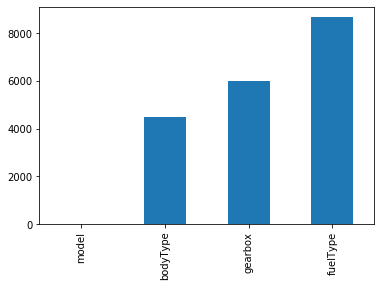

In [22]:
# nan可视化
isNull = trainData.isnull().sum()
isNull = isNull[isNull > 0]
isNull.sort_values(inplace=True)
isNull.plot.bar()

In [23]:

!pip install missingno
 


In [24]:
import missingno as msno

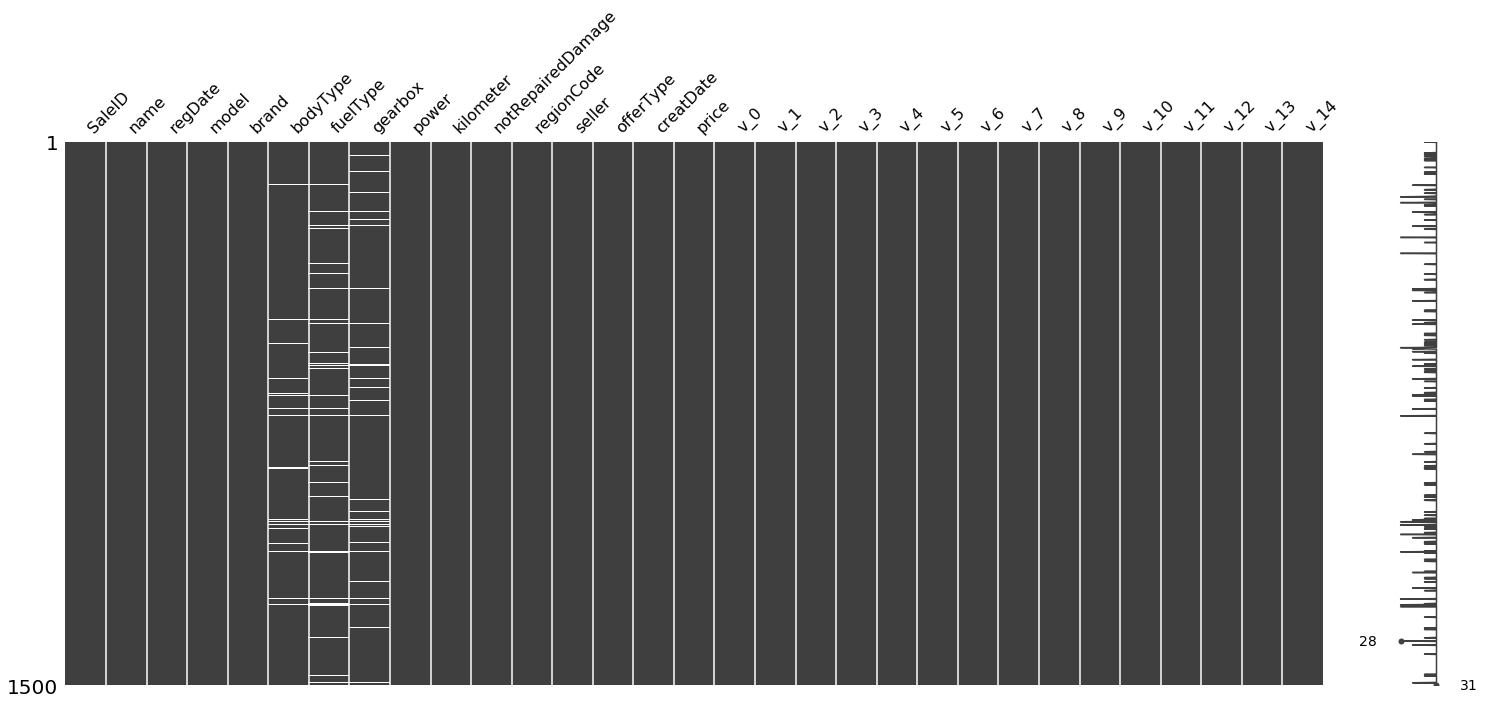

In [25]:
# 无效矩阵的数据密集显示
msno.matrix(trainData.sample(1500))

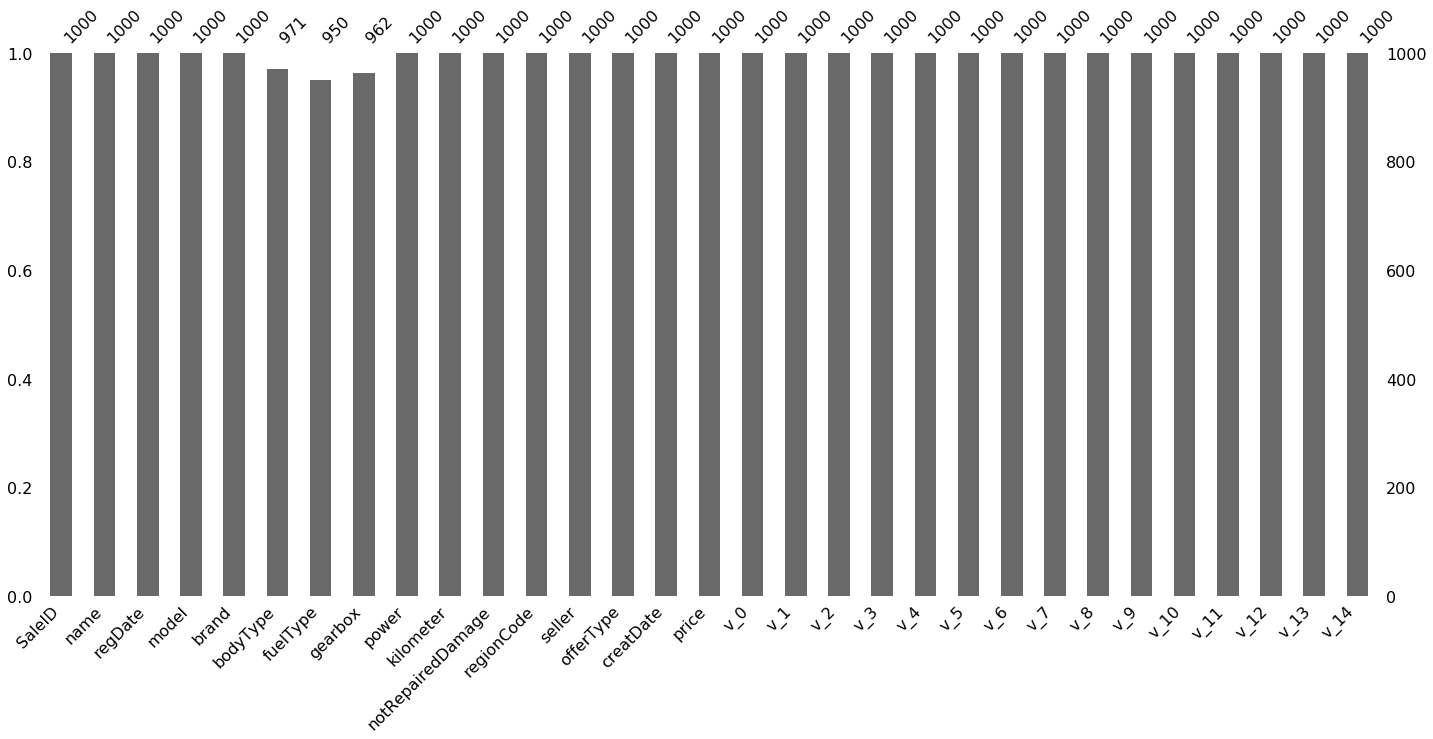

In [26]:
#条形图
msno.bar(trainData.sample(1000))

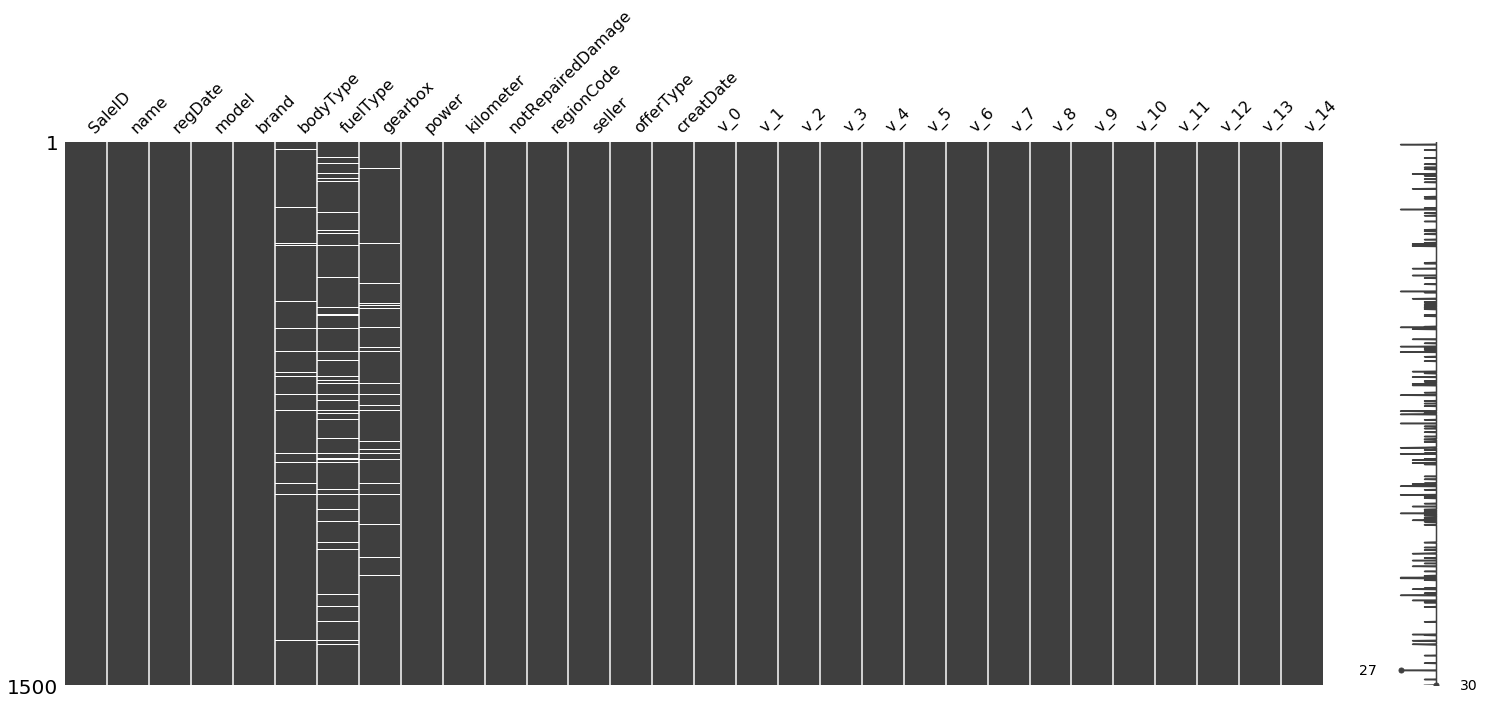

In [27]:
msno.matrix(testData.sample(1500))

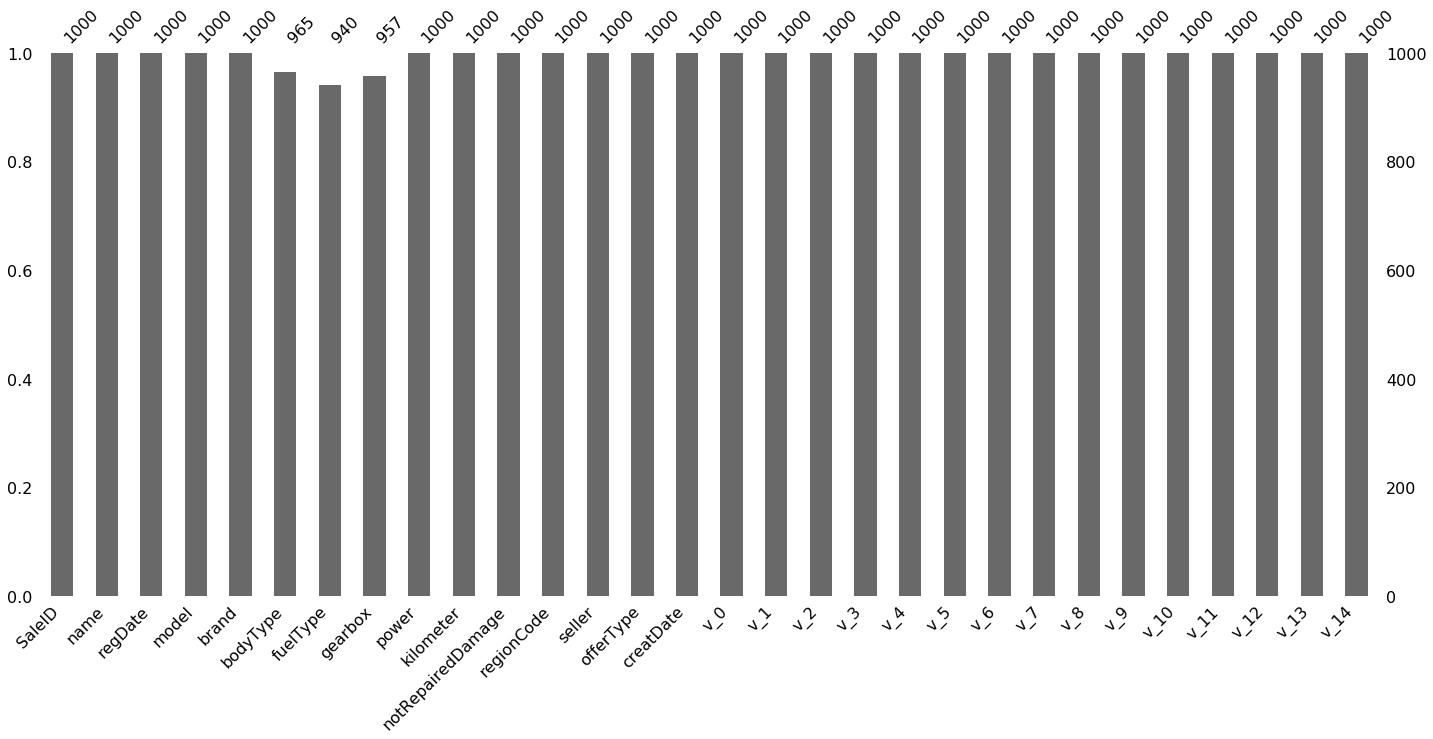

In [28]:
msno.bar(testData.sample(1000))

可以看出，测试集的缺省和训练集的差不多, 可视化有三列有缺省，flueType缺省得最多

### 异常值检测

In [29]:
print(trainData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [30]:
catFea = ['name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
           'gearbox', 'kilometer', 'notRepairedDamage', 'regionCode',
           'seller', 'offerType', 'creatDate']
for feature in catFea:
    print(feature + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(feature,trainData[feature].nunique()))
    print(trainData[feature].value_counts())

name的特征分布如下：
name特征有个99662不同的值
708       282
387       282
55        280
1541      263
203       233
         ... 
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64
regDate的特征分布如下：
regDate特征有个3894不同的值
20000008    180
20000011    158
20000004    157
20000010    157
20000002    155
           ... 
19910807      1
19910902      1
20151209      1
19911011      1
20151201      1
Name: regDate, Length: 3894, dtype: int64
model的特征分布如下：
model特征有个248不同的值
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
245.0        2
209.0        2
240.0        2
242.0        2
247.0        1
Name: model, Length: 248, dtype: int64
brand的特征分布如下：
brand特征有个40不同的值
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22  

<Figure size 432x288 with 0 Axes>

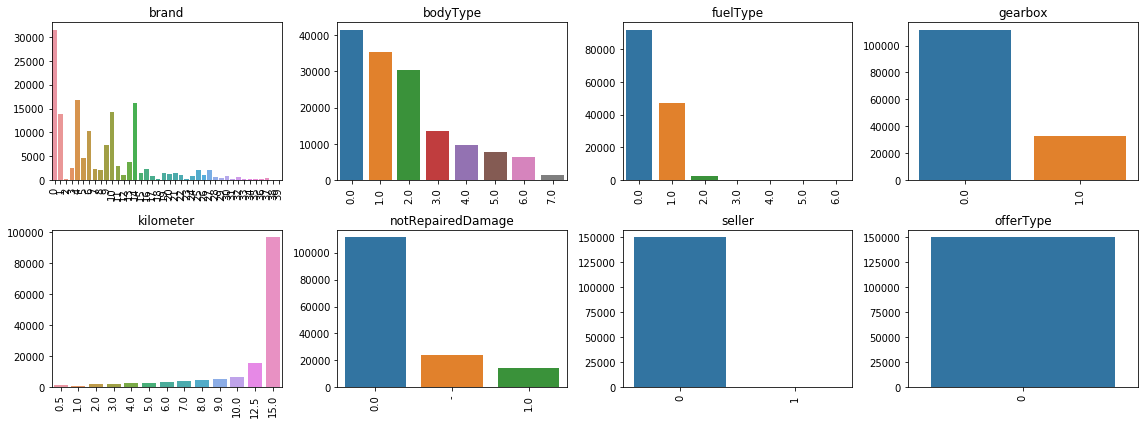

In [31]:
#类别特征取值较少的，画出直方图,
#'notRepairedDamage'存在无效字符，'seller,offerType'数值分布极不平衡
plt.figure()
plt.figure(figsize=(16, 6))
n = 1
for feature in catFea:
    if trainData[feature].nunique()<50:
        plt.subplot(2, 4, n)
        v = trainData[feature].value_counts()
        fig = sns.barplot(x=v.index, y=v.values)
        n += 1
        for item in fig.get_xticklabels():
            item.set_rotation(90)
        plt.title(feature)
plt.tight_layout()
plt.show()

### 了解预测值的分布并进行修正

In [32]:
trainData['price'].value_counts()

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
         ... 
25321       1
8886        1
8801        1
37920       1
8188        1
Name: price, Length: 3763, dtype: int64

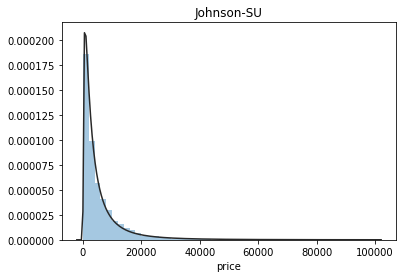

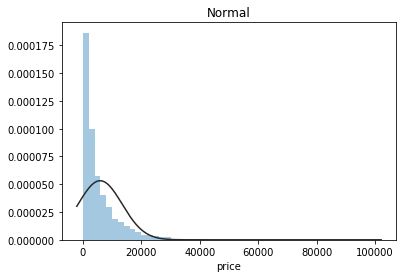

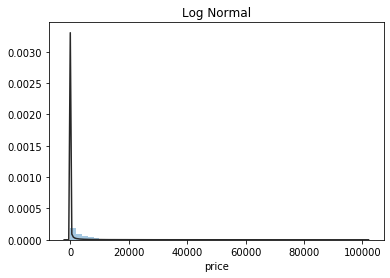

In [33]:
##  总体分布概况
import scipy.stats as st
y = trainData['price']
plt.figure(1); plt.title('Johnson-SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

<Figure size 432x288 with 0 Axes>

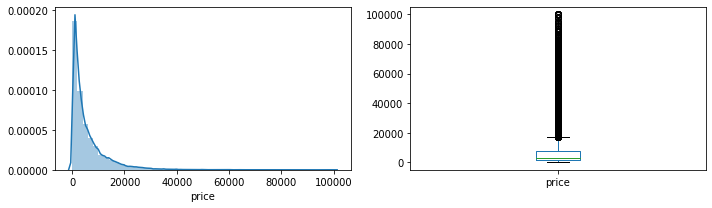

In [34]:
#'price'为长尾分布，需要做数据转换
plt.figure()
plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
sns.distplot(trainData['price'])
plt.subplot(1,2,2)
trainData['price'].plot.box()
plt.tight_layout()

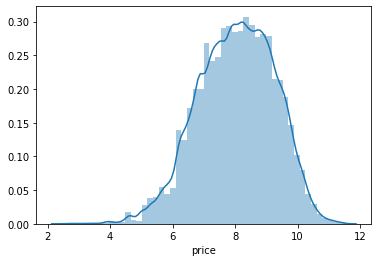

In [35]:
#'price'转化后的分布
plt.figure()
sns.distplot(np.log1p(trainData['price']))

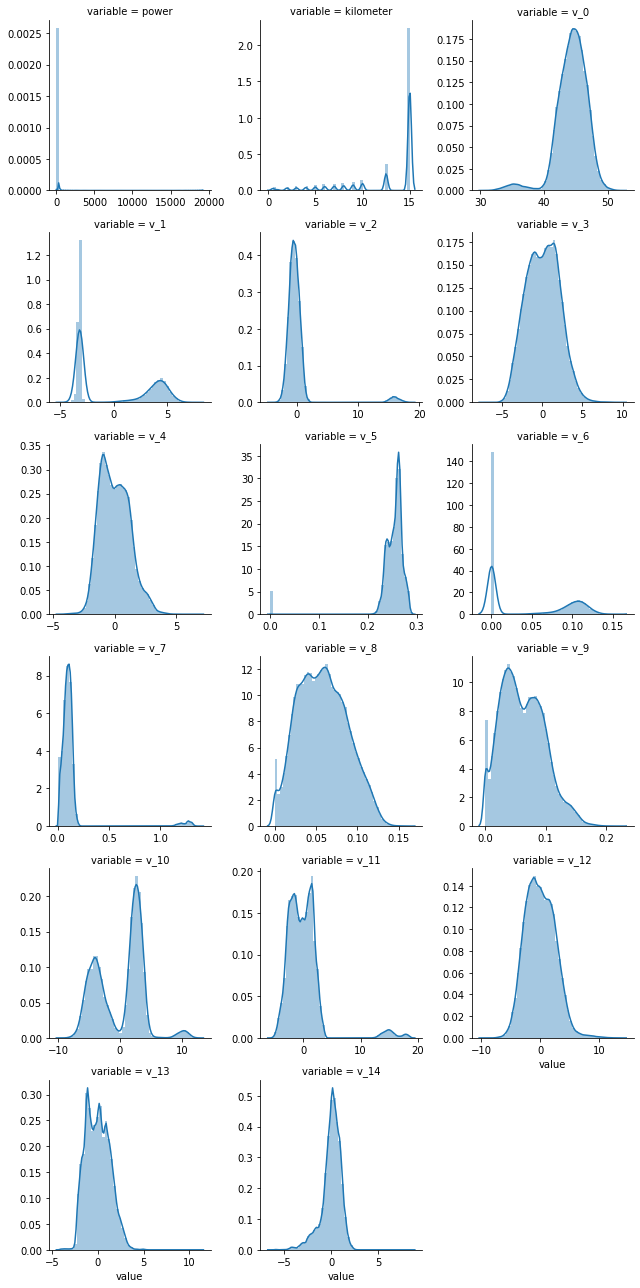

In [36]:
#数值特征分布，
numericFeatures = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]
nf = pd.melt(trainData, value_vars=numericFeatures)
fg = sns.FacetGrid(nf, col="variable",  col_wrap=3, sharex=False, sharey=False)
fg = fg.map(sns.distplot, "value")

'power'的分布比较奇怪，因此对power做处理

In [37]:
#相关性分析
numericFeatures.append('price')
priceNumeric = trainData[numericFeatures]
correlation = priceNumeric.corr()
print(correlation['price'].sort_values(ascending = False),'\n')

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



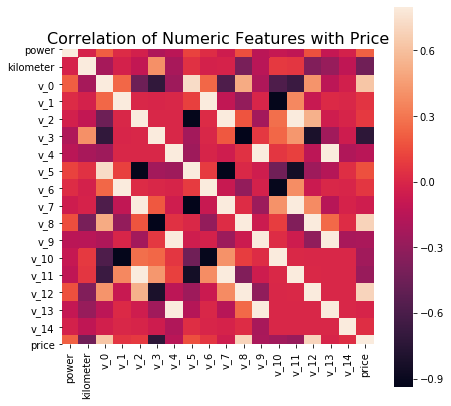

In [38]:
f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

匿名特征v_0,v_3,v_8,v_12与'price'相关性很高

In [39]:
del priceNumeric['price']

In [40]:
# 查看几个特征得 偏度和峰值
for nf in numericFeatures:
    print('{:15}'.format(nf), 
          'skewness: {:05.2f}'.format(trainData[nf].skew()) , 
          '   ' ,
          'kurtosis: {:06.2f}'.format(trainData[nf].kurt())  
         )

power           skewness: 65.86     kurtosis: 5733.45
kilometer       skewness: -1.53     kurtosis: 001.14
v_0             skewness: -1.32     kurtosis: 003.99
v_1             skewness: 00.36     kurtosis: -01.75
v_2             skewness: 04.84     kurtosis: 023.86
v_3             skewness: 00.11     kurtosis: -00.42
v_4             skewness: 00.37     kurtosis: -00.20
v_5             skewness: -4.74     kurtosis: 022.93
v_6             skewness: 00.37     kurtosis: -01.74
v_7             skewness: 05.13     kurtosis: 025.85
v_8             skewness: 00.20     kurtosis: -00.64
v_9             skewness: 00.42     kurtosis: -00.32
v_10            skewness: 00.03     kurtosis: -00.58
v_11            skewness: 03.03     kurtosis: 012.57
v_12            skewness: 00.37     kurtosis: 000.27
v_13            skewness: 00.27     kurtosis: -00.44
v_14            skewness: -1.19     kurtosis: 002.39
price           skewness: 03.35     kurtosis: 019.00


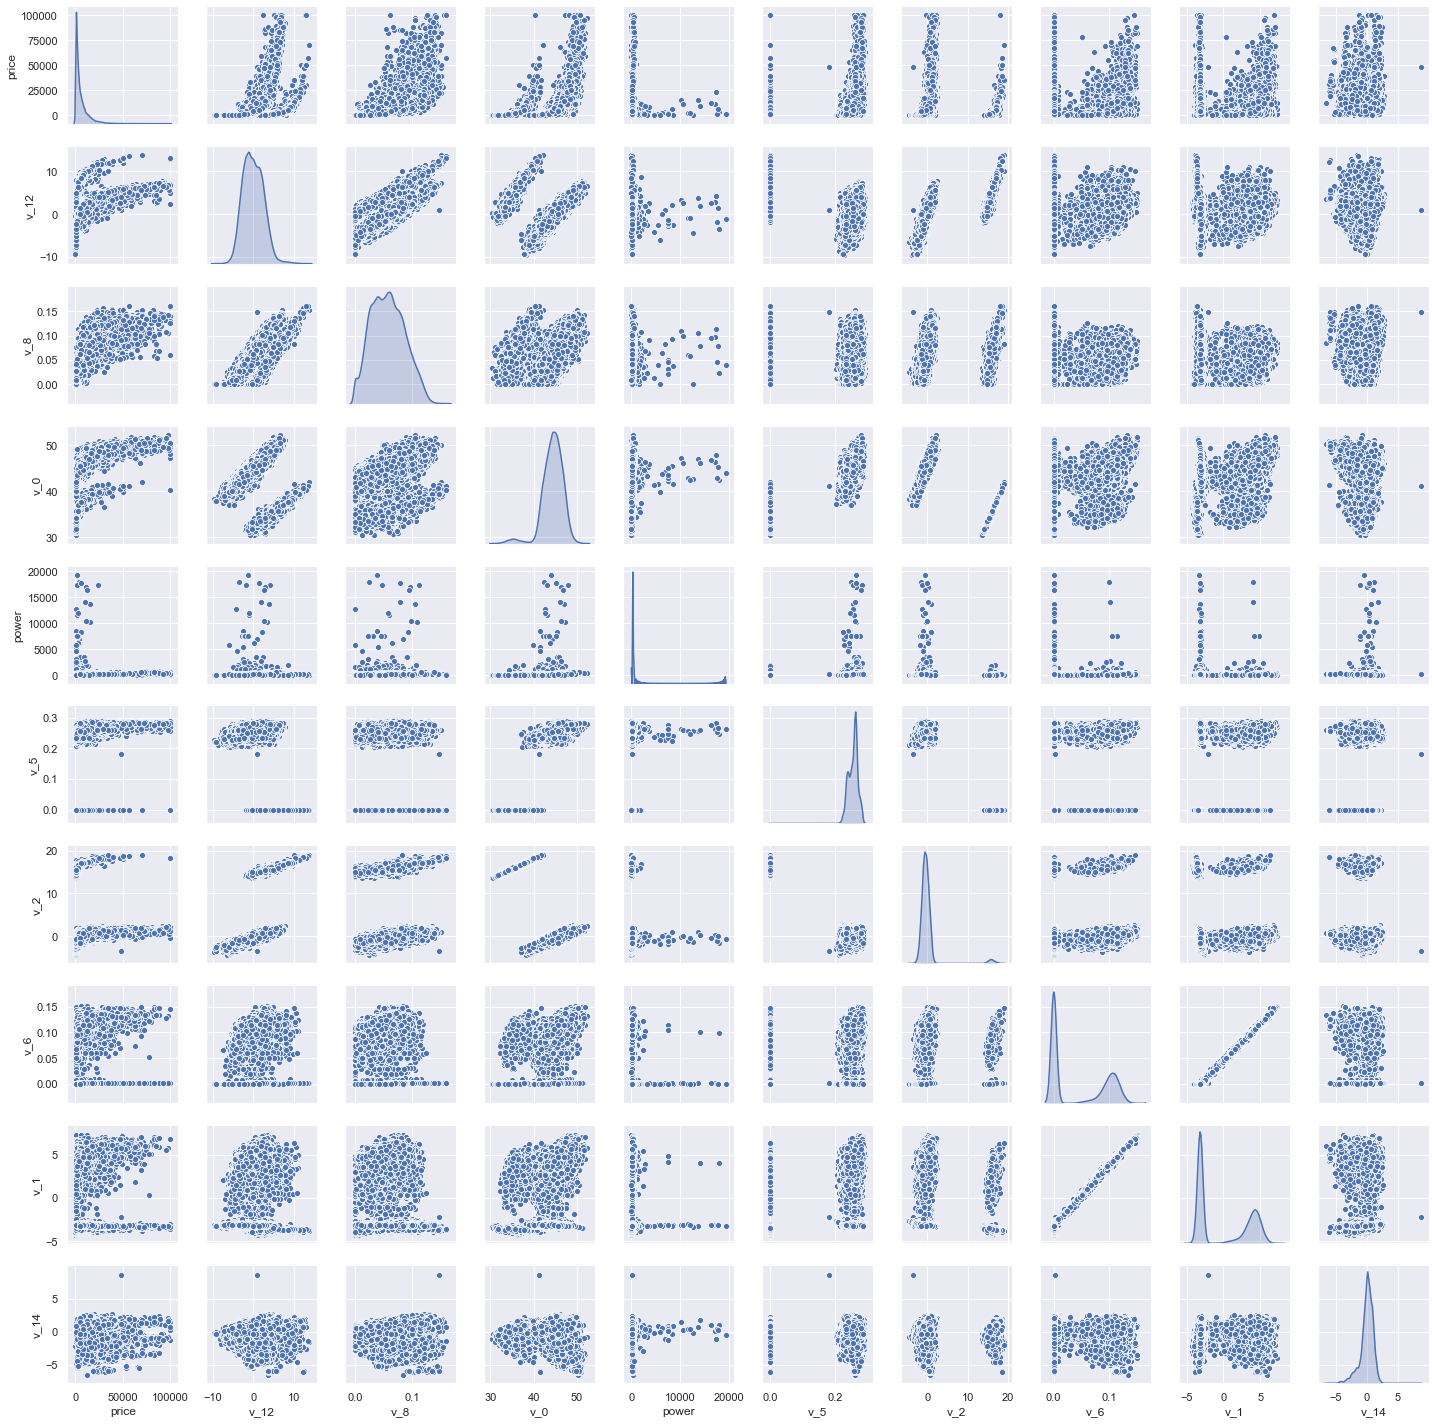

In [41]:
# 数字特征相互之间的关系可视化
sns.set()
cols = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(trainData[cols],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

数据预处理

In [42]:
all_data = pd.concat([trainData, testData], ignore_index=True)

In [43]:
all_data['name_count'] = all_data.groupby(['name'])['SaleID'].transform('count')
del all_data['name']
del all_data['offerType']
del all_data['seller']

#对'price'做对数变换
all_data['price'] = np.log1p(all_data['price'])

用众数填充缺失值

In [44]:
all_data['fuelType'] = all_data['fuelType'].fillna(0)
all_data['gearbox'] = all_data['gearbox'].fillna(0)
all_data['bodyType'] = all_data['bodyType'].fillna(0)
all_data['model'] = all_data['model'].fillna(0)

处理异常值

In [45]:
all_data['power'] = all_data['power'].map(lambda x: 600 if x>600 else x)#赛题限定power<=600
all_data['notRepairedDamage'] = all_data['notRepairedDamage'].astype('str').apply(lambda x: x if x != '-' else None).astype('float32')

对可分类的连续特征进行分桶

In [46]:
bin_split = [i*10 for i in range(31)]
all_data['power_bin'] = pd.cut(all_data['power'], bin_split, labels=False)

bin_split = [i*10 for i in range(24)]
all_data['model_bin'] = pd.cut(all_data['model'], bin_split, labels=False)

三、特征工程

In [47]:
#时间提取出年，月，日和使用时间
from datetime import datetime
def dateProcess(x):
    year = int(str(x)[:4])
    month = int(str(x)[4:6])
    day = int(str(x)[6:8])

    if month < 1:
        month = 1

    date = datetime(year, month, day)
    return date

all_data['regDate'] = all_data['regDate'].apply(dateProcess)
all_data['creatDate'] = all_data['creatDate'].apply(dateProcess)
all_data['regDate_year'] = all_data['regDate'].dt.year
all_data['regDate_month'] = all_data['regDate'].dt.month
all_data['regDate_day'] = all_data['regDate'].dt.day
all_data['creatDate_year'] = all_data['creatDate'].dt.year
all_data['creatDate_month'] = all_data['creatDate'].dt.month
all_data['creatDate_day'] = all_data['creatDate'].dt.day
all_data['car_age_day'] = (all_data['creatDate'] - all_data['regDate']).dt.days#二手车使用天数
all_data['car_age_year'] = round(all_data['car_age_day'] / 365, 1)#二手车使用年数

类别特征'model', 'brand', 'bodyType', 'fuelType','gearbox', 'kilometer', 'notRepairedDamage', 'regionCode',和数值特征'price','power','car_age_day'的交叉统计 只保留了部分有效组合。

In [48]:
#类别特征对价格的统计最大，最小，平均值等等
catCols = ['brand','model','kilometer','fuelType','bodyType']
for cc in catCols:
    temp = trainData.groupby(cc,as_index=False)['price'].agg(
        {cc+'_count':'count',cc+'_price_max':'max',cc+'_price_median':'median',
         cc+'_price_min':'min',cc+'_price_sum':'sum',cc+'_price_std':'std',cc+'_price_mean':'mean'})
    all_data = pd.merge(all_data,temp,on=cc,how='left')

#行驶路程与功率统计
kp = ['kilometer','power']
temp1 = trainData.groupby(kp[0],as_index=False)[kp[1]].agg(
        {kp[0]+'_'+kp[1]+'_count':'count',kp[0]+'_'+kp[1]+'_max':'max',kp[0]+'_'+kp[1]+'_median':'median',
         kp[0]+'_'+kp[1]+'_min':'min',kp[0]+'_'+kp[1]+'_sum':'sum',kp[0]+'_'+kp[1]+'_std':'std',kp[0]+'_'+kp[1]+'_mean':'mean'})
all_data = pd.merge(all_data,temp1,on=kp[0],how='left')

由前面数据探索的结果可知部分v_0,v_3,v_8,v_12与price的相关性很高，所以做一些简单组合，发现效果不错

In [49]:
numCols = [0,3,8,12]
for m in numCols:
    for n in numCols:
        all_data['new'+str(m)+'*'+str(n)]=all_data['v_'+str(m)]*all_data['v_'+str(n)]
        
for m in numCols:
    for n in numCols:
        all_data['new'+str(m)+'+'+str(n)]=all_data['v_'+str(m)]+all_data['v_'+str(n)]

for m in numCols:
    for n in numCols:
        all_data['new'+str(m)+'-'+str(n)]=all_data['v_'+str(m)]-all_data['v_'+str(n)]

for n in range(15):
    all_data['new'+str(n)+'*year']=all_data['v_'+str(n)] * all_data['car_age_year']

In [50]:
#划分训练数据和测试数据
all_data_copy = all_data.copy()
test = all_data_copy[all_data_copy['price'].isnull()]
xTrain = all_data_copy[all_data_copy['price'].notnull()].drop(['price','regDate','creatDate','SaleID','regionCode'],axis=1)
yTrain = all_data_copy[all_data_copy['price'].notnull()]['price']
xTest = all_data_copy[all_data_copy['price'].isnull()].drop(['price','regDate','creatDate','SaleID','regionCode'],axis=1)

In [51]:
#五折交叉检验
feat_n = list(xTrain)
pre = np.zeros(xTrain.shape[0])
result = test[['SaleID']].copy()
result['price'] = 0
feat_df = pd.DataFrame({'feat': feat_n, 'imp': 0})
kf = KFold(n_splits=5, shuffle=True, random_state=29)

lgbm = LGBMRegressor(n_estimators=10000,learning_rate=0.02,boosting_type= 'gbdt',objective = 'regression_l1',max_depth = -1,
    num_leaves=31,min_child_samples = 20,feature_fraction = 0.8,bagging_freq = 1,bagging_fraction = 0.8,
    lambda_l2 = 2,random_state=29,metric='mae'
)

cv_mae = 0
for i, (trn_idx, val_idx) in enumerate(kf.split(xTrain, yTrain)):
    print('--------------------- {} fold ---------------------'.format(i+1))
    trn_x, trn_y = xTrain.iloc[trn_idx].reset_index(drop=True), yTrain[trn_idx]
    val_x, val_y = xTrain.iloc[val_idx].reset_index(drop=True), yTrain[val_idx]
    lgbm.fit(trn_x, trn_y,eval_set=[(val_x, val_y)],eval_metric='mae',early_stopping_rounds=300,verbose=300)
    
    result['price'] += np.expm1(lgbm.predict(xTest)) / kf.n_splits
    pre[val_idx] = lgbm.predict(val_x)
    print('val mae:', mean_absolute_error(np.expm1(val_y), np.expm1(pre[val_idx])))
    cv_mae += mean_absolute_error(np.expm1(val_y), np.expm1(pre[val_idx]))/kf.n_splits

print('cv mae大小是:', cv_mae)
#生成提交文件
result.to_csv('sumbit.csv',index=False)

--------------------- 1 fold ---------------------
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 300 rounds
[300]	valid_0's l1: 0.145889
[600]	valid_0's l1: 0.129052
[900]	valid_0's l1: 0.123024
[1200]	valid_0's l1: 0.119696
[1500]	valid_0's l1: 0.117636
[1800]	valid_0's l1: 0.115942
[2100]	valid_0's l1: 0.114834
[2400]	valid_0's l1: 0.113937
[2700]	valid_0's l1: 0.113116
[3000]	valid_0's l1: 0.112516
[3300]	valid_0's l1: 0.111949
[3600]	valid_0's l1: 0.111472
[3900]	valid_0's l1: 0.111084
[4200]	valid_0's l1: 0.110645
[4500]	valid_0's l1: 

val mae: 466.99651409443095
cv mae大小是: 461.51619325247634
